In [606]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv('C:/Users/deida/Documents/CodeYou/Data_Analysis/my_data_project/phish_setlist_analysis/phish.csv')

print(df.shape)

(30883, 31)


In [607]:
print(df.columns)


Index(['song', 'date', 'position', 'set', 'set_name', 'location', 'venue_name',
       'tour', 'ratings', 'duration_song', 'duration_show', 'like_count_song',
       'like_count_show', 'id_song', 'id_show', 'id_tour', 'artist',
       'total_times_played', 'debut', 'year', 'gap', 'notes', 'debut_dummy',
       'notes_dummy', 'cover_dummy', 'adj_gap', 'city', 'state', 'country',
       'latitude', 'longitude'],
      dtype='object')


In [608]:
df.drop(columns = ['duration_show', 'like_count_song', 'like_count_show', 'id_song', 'id_show', 'id_tour', 'adj_gap', 'latitude', 'longitude' , 'notes', 'debut_dummy', 'notes_dummy', 'set'])



,song,date,position,set_name,location,venue_name,tour,ratings,duration_song,artist,total_times_played,debut,year,gap,cover_dummy,city,state,country
0,Scarlet Begonias,1983-12-02T00:00:00Z,1,Set 2,"Burlington, VT","Harris-Millis Cafeteria, University of Vermont",1983 Tour,4.2128,09:18,Grateful Dead,3.0,1983-12-02,1983.0,1.0,1,Burlington,VT,United States
1,Fire on the Mountain,1983-12-02T00:00:00Z,2,Set 2,"Burlington, VT","Harris-Millis Cafeteria, University of Vermont",1983 Tour,4.2128,07:53,Diga Rhythm Band,2.0,1983-12-02,1983.0,1.0,1,Burlington,VT,United States
2,In the Midnight Hour,1984-11-03T00:00:00Z,1,Set 1,"Burlington, VT","Slade Hall, University of Vermont",1984 Tour,3.2963,06:23,Wilson Pickett,5.0,1983-12-02,1984.0,3.0,1,Burlington,VT,United States
3,Wild Child > Jam,1984-11-03T00:00:00Z,2,Set 1,"Burlington, VT","Slade Hall, University of Vermont",1984 Tour,3.2963,05:20,NaN,NaN,NaN,1984.0,NaN,1,Burlington,VT,United States
4,Bertha > St. Stephen,1984-11-03T00:00:00Z,3,Set 1,"Burlington, VT","Slade Hall, University of Vermont",1984 Tour,3.2963,13:39,NaN,NaN,NaN,1984.0,NaN,1,Burlington,VT,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30878,Carini,2017-01-15T00:00:00Z,15,Set 2,"Riviera Maya, Quintana Roo Mexico",Barcelo Maya Beach,2017 Riviera Maya Run,4.5560,08:48,Phish,90.0,1997-02-17,2017.0,3.0,0,Riviera Maya,Quintana Roo,Mexico
30879,David Bowie,2017-01-15T00:00:00Z,16,Set 2,"Riviera Maya, Quintana Roo Mexico",Barcelo Maya Beach,2017 Riviera Maya Run,4.5560,13:36,Phish,471.0,1986-10-31,2017.0,12.0,0,Riviera Maya,Quintana Roo,Mexico
30880,Harry Hood,2017-01-15T00:00:00Z,17,Set 2,"Riviera Maya, Quintana Roo Mexico",Barcelo Maya Beach,2017 Riviera Maya Run,4.5560,12:23,Phish,371.0,1985-10-30,2017.0,5.0,0,Riviera Maya,Quintana Roo,Mexico
30881,Slave to the Traffic Light,2017-01-15T00:00:00Z,18,Encore,"Riviera Maya, Quintana Roo Mexico",Barcelo Maya Beach,2017 Riviera Maya Run,4.5560,11:01,Phish,233.0,1984-12-01,2017.0,3.0,0,Riviera Maya,Quintana Roo,Mexico


In [609]:
df['cover_dummy'] = df['cover_dummy'].replace({0: False, 1: True})

print(df['cover_dummy'].head(50))

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13    False
14    False
15     True
16     True
17     True
18     True
19    False
20    False
21     True
22    False
23    False
24    False
25    False
26     True
27    False
28    False
29     True
30     True
31     True
32    False
33    False
34     True
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48     True
49     True
Name: cover_dummy, dtype: bool


C:\Users\deida\AppData\Local\Temp\ipykernel_37852\2464925226.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cover_dummy'] = df['cover_dummy'].replace({0: False, 1: True})


In [610]:
#print(df.isnull().sum())

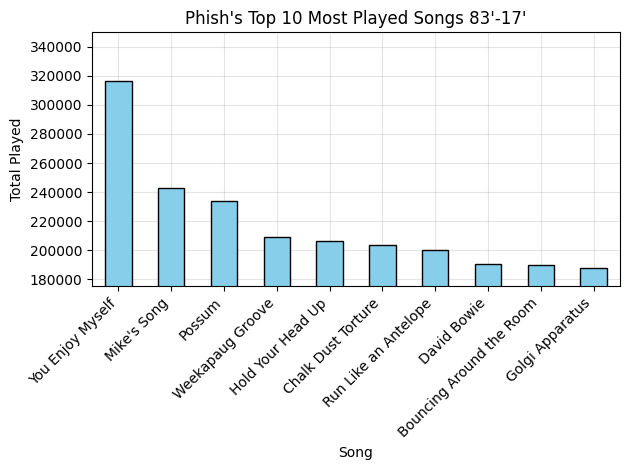

In [611]:
#Top 10 Most Played Songs Bar Chart

top_songs = df.groupby('song')['total_times_played'].sum().nlargest(10)
# Create the bar plot
top_songs.plot(kind='bar', color='skyblue', edgecolor='black')
# Set the title and labels
plt.title("Phish's Top 10 Most Played Songs 83'-17'")
plt.xlabel('Song')
plt.ylabel('Total Played')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.ylim(175000, 350000) # Adjust the y-axis limits
# Add a semi-transparent grid
plt.grid(True, linestyle='-', color='gray', alpha=0.2)  # Adjust alpha for transparency

# Ensure grid lines are behind the bars
plt.gca().set_axisbelow(True)
#plt.gca().invert_xaxis()
plt.tight_layout() # Adjust layout to prevent clipping
plt.show() # Display the plot


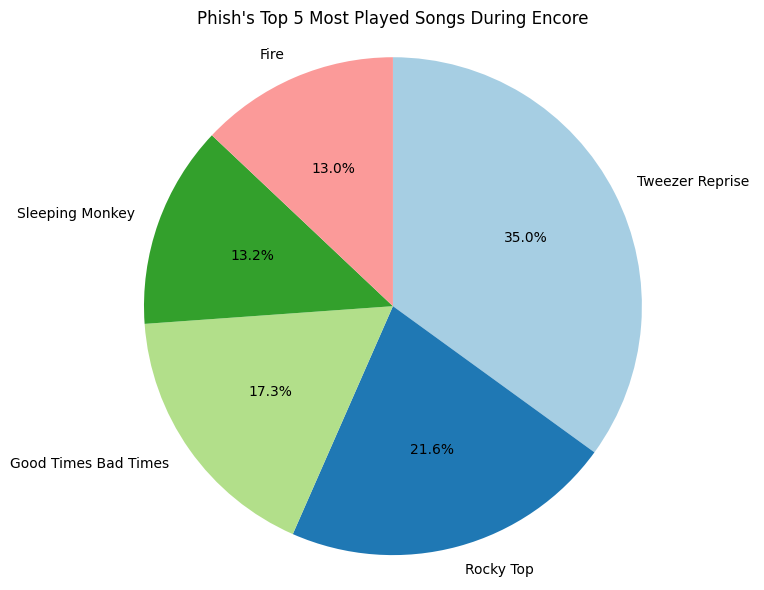

In [612]:
#Top 5 Most Played Songs During Encore Pie Chart

# Filter the dataset to include only encore performances
encore_df = df[df['set_name'] == 'Encore']

# Calculate the total number of encores
total_encores = encore_df.shape[0]

# Count the occurrences of each song in the encore setlists
encore_song_counts = encore_df['song'].value_counts()

# Select the top 5 most played songs in encores
top_encore_songs = encore_song_counts.head(5)

# Calculate the proportion of encores dedicated to each of the top 5 songs
proportions = (top_encore_songs / total_encores) * 100

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(proportions, labels=top_encore_songs.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=plt.cm.Paired.colors) #wedgeprops={'width': 0.4} (DONUT)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title("Phish's Top 5 Most Played Songs During Encore")

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\deida\AppData\Local\Temp\ipykernel_37852\765953412.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  top_song_yearly = top_song_df.set_index('date').resample('Y')['duration_song'].mean()


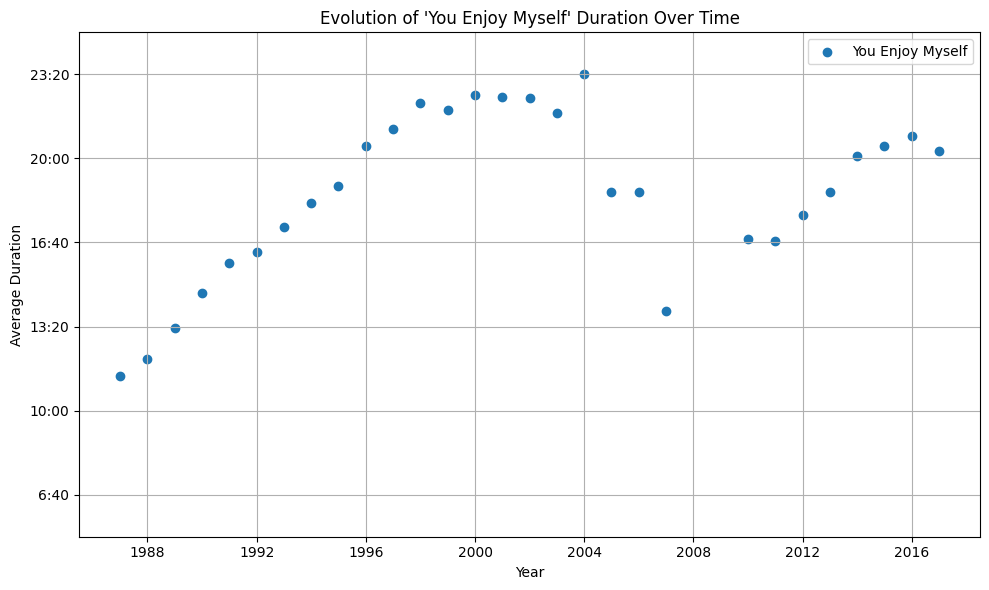

In [613]:

# Custom function to convert 'mm:ss' string to seconds
def convert_to_seconds(val):
    try:
        if isinstance(val, str) and ':' in val:
            minutes, seconds = map(int, val.strip().split(':'))
            return minutes * 60 + seconds
        return float(val)
    except:
        return None

# Apply conversion
df['duration_song'] = df['duration_song'].apply(convert_to_seconds)

# Fill missing values with column mean
df['duration_song'] = df['duration_song'].fillna(df['duration_song'].mean())

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.tz_localize(None)

# Drop rows without valid date or duration
df = df.dropna(subset=['date', 'duration_song'])


# Get the top song by count
top_song = df['song'].value_counts().idxmax()  # Should be "You Enjoy Myself"
top_song_df = df[df['song'] == top_song]

# Resample by year and calculate average duration
top_song_yearly = top_song_df.set_index('date').resample('Y')['duration_song'].mean()

# Smooth with rolling average (optional)
top_song_yearly_rolling = top_song_yearly.rolling(window=3, min_periods=1).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(top_song_yearly_rolling.index, top_song_yearly_rolling, marker='o', label=top_song)

# Format y-axis as mm:ss
def seconds_to_mmss(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    return f"{minutes}:{seconds:02d}"

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(seconds_to_mmss))

plt.title(f"Evolution of '{top_song}' Duration Over Time")
plt.xlabel('Year')
plt.ylabel('Average Duration')
plt.ylim(300, 1500)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()